# Eye Disease Classification

### Dataset (Folders are labels)

dataset (main data-set folder)
   ├───cataract
   ├───diabetic_retinopathy
   ├───glaucoma
   └───normal (healthy)


# Table of Contents

In [1]:
'''
Package Installs
'''
!python.exe -m pip install --upgrade pip

!pip install numpy==1.26.3
!pip install matplotlib==3.8.2
!pip install seaborn==0.13.1
!pip install polars==0.20.3
!pip install scikit-learn==1.3.2
!pip install tensorflow==2.15.0


# Imports

In [2]:
import sys
import warnings
from typing import List

import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

#Custom Python Libraries
from utils.dataset_reader import load_eye_dataset, eye_dataset_to_dictionary

In [3]:
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

print(f'Python Version: {sys.version}')
print(f'Tensorflow Version: {tf.__version__}. Python 3.8 - 3.11 only is supported.')

Python Version: 3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]
Tensorflow Version: 2.15.0. Python 3.8 - 3.11 only is supported.


# Pre-Processing

In [4]:
'''
Load the file paths and there label into a Polars DataFrame
'''
eye_disease_list = load_eye_dataset(r'.\datasets')
eye_disease_data = eye_dataset_to_dictionary(eye_disease_list)

eye_disease_df = pl.DataFrame(eye_disease_data)

eye_disease_df.head(10)

image_path,image-label
str,str
""".\datasets\cat…","""cataract"""
""".\datasets\cat…","""cataract"""
""".\datasets\cat…","""cataract"""
""".\datasets\cat…","""cataract"""
""".\datasets\cat…","""cataract"""
""".\datasets\cat…","""cataract"""
""".\datasets\cat…","""cataract"""
""".\datasets\cat…","""cataract"""
""".\datasets\cat…","""cataract"""


In [5]:
'''
Verify that all the data is loaded.
'''

cataract_count = eye_disease_df['image-label'].eq('cataract').sum()
assert cataract_count == 1038, f'Expected 1038 images, got [{cataract_count}].'

diabetic_retinopathy_count = eye_disease_df['image-label'].eq('diabetic_retinopathy').sum()
assert diabetic_retinopathy_count == 1098, f'Expected 1098 images, got [{diabetic_retinopathy_count}].'

glaucoma_count = eye_disease_df['image-label'].eq('glaucoma').sum()
assert glaucoma_count == 1007, f'Expected 1007 images, got [{glaucoma_count}].'

normal_count = eye_disease_df['image-label'].eq('normal').sum()
assert normal_count == 1074, f'Expected 0 images, got[{normal_count}].'

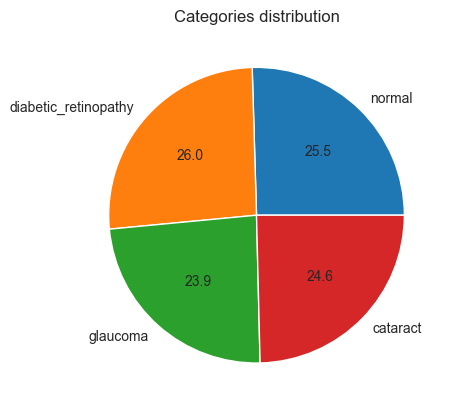

In [6]:
'''
Visualize dataset distributions
'''

distribution_data = {
    'categories': ['normal', 'diabetic_retinopathy', 'glaucoma', 'cataract'],
    'counts': [normal_count, diabetic_retinopathy_count, glaucoma_count, cataract_count]
}

plt.pie(distribution_data['counts'], labels=distribution_data['categories'], autopct='%1.1f')
plt.title('Categories distribution')
plt.show()

# Split Datasets

# Model Building

# Model Compiling

# Model Training

# Model Evaluation